In [32]:
print("Starting Computations....")
# Importing some Useful Libraries

import pandas as pd
import matplotlib.pyplot as plt

Starting Computations....


In [33]:
print("Disabling TF Warnings....")

# Disabling tf warnings

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Disabling TF Warnings....


## Reading CSVs

In [34]:
print("Reading CSVs......")


digit = pd.read_csv('/Users/moutasemakkad/Desktop/final/Data/mnist_test.csv',header=None, low_memory=False)

alphabet =pd.read_csv('/Users/moutasemakkad/Desktop/final/Data/A_Z Handwritten Data.csv',header=None, low_memory=False)


digit1 = pd.read_csv('/Users/moutasemakkad/Desktop/final/Data/mnist_train.csv',header=None, low_memory=False)

Reading CSVs......


# Relabeling / Merging Data / Preprocessing 

In [35]:
# Since both the digits and the alphabet's labels start from zero, we would have to make them unique. 
# I have added 10 to all the alphabet columns EX: A is now 0+10 => 10

alphabet[0] =  alphabet[0] + 10

In [36]:
#Dropped some label columns that we do not need


digit.drop(digit.index[0], inplace=True)
digit1.drop(digit1.index[0], inplace=True)

print("Dropped Label Columns......")

Dropped Label Columns......


In [37]:
# Merged the the datasets into one DF

# Note: we each row is a vector of 784 pixels, 
# however, the reason why we see that we only have 784 (should be 785 since we have the label column) is because
# It's 0 indexed


df_total = pd.concat([alphabet, digit, digit1])

print("Merged All data into one df......")
df_total.head()

Merged All data into one df......


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# We can verify that here

len(df_total.columns)

785

In [39]:
print("Converting Data to Floats......")
# Concatination has turned the value to strings or "Pandas Objects," we had to convert them to Floats

df_total = df_total.astype(float)


Converting Data to Floats......


Amount of each labels


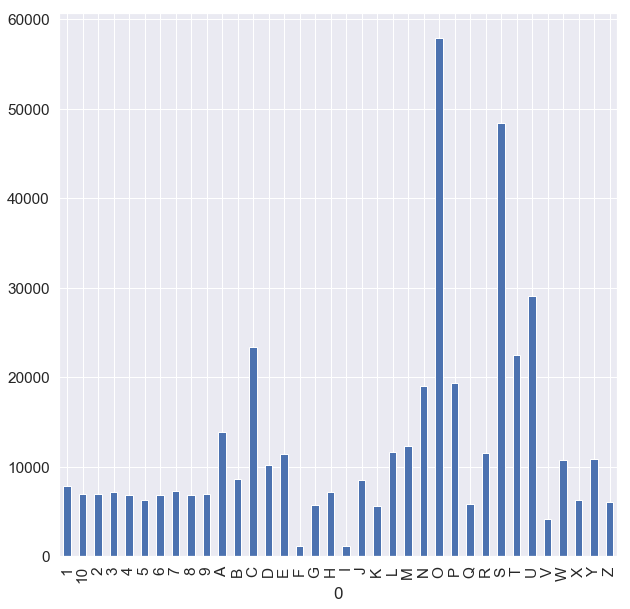

In [62]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'10', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'} 
dataset_alphabets = df_total.copy()
dataset_alphabets[0] = dataset_alphabets[0].map(alphabets_mapper)

label_size = dataset_alphabets.groupby(dataset_alphabets[0]).size()
label_size.plot.bar(figsize=(10,10))
plt.show()


## Preparing the data for ScikitLearn

Step -1-

In [42]:
# We have to separate the labels from the features to prepare the data for ScikitLearn's "train_test_split()"

y = df_total.iloc[:,0]

X = df_total.drop(labels=0, axis=1)

In [43]:
# Verify that we have the right shape after manipulation

X.shape

(442451, 784)

Step -2-

In [44]:
# We need to convert our DFs to Matrxies or NumpyArrays

y = y.as_matrix()
X = X.as_matrix()
print("Converted to matrix......")

Converted to matrix......


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [45]:
X.shape

(442451, 784)

## Splitting the Data into Training and Testing Data

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:

print("Splitting Data......")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Splitting Data......


In [48]:

len_tarin = len(X_train)

len_test = len(X_test)

In [49]:
X_train /= 255
X_test /= 255

In [50]:
# print("Reshaping Data......")
X_train = X_train.reshape(len_tarin,784) # we not have matrixes of 28x28 we need to vectorize each digit into 784
X_test = X_test.reshape(len_test,784)



# print("Creating NN......")
input_layer_size = 784    # 28X28 Pixles
hidden_layer_size = 35    # 25 hidden units
num_labels = 36          # 36 labels, from 0 to 9

In [51]:

# we need to hot-encode Y-values each digit into 0s and 1s so it look in the form of 0000001010
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_labels)
y_test = to_categorical(y_test, num_classes=num_labels)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [53]:

# Step 2: Create MLP model
model = Sequential()     
model.add(Dense(512, activation='relu', input_shape=(784,)))    #First hidden layer, 512 neurons, activation relu, input 784 array --num pixels--
model.add(Dropout(0.2))                                         
model.add(Dense(512, activation='relu'))                       
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))   # Final layer, 10 outputs 1-10
model.summary()

W1002 02:08:45.284475 4414715328 deprecation_wrapper.py:119] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1002 02:08:45.362196 4414715328 deprecation_wrapper.py:119] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1002 02:08:45.375097 4414715328 deprecation_wrapper.py:119] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1002 02:08:45.396325 4414715328 deprecation_wrapper.py:119] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_w

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                18468     
Total params: 683,044
Trainable params: 683,044
Non-trainable params: 0
_________________________________________________________________


In [54]:
# print("Compiling......")
# Compile

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W1002 02:09:08.093856 4414715328 deprecation_wrapper.py:119] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1002 02:09:08.119138 4414715328 deprecation_wrapper.py:119] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [60]:
# Fit our model to the data set
# print("Fitting......")
# Increasing the epochs and tge batch size helped alot
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=300, verbose=2)

Train on 296442 samples, validate on 146009 samples
Epoch 1/20


KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("model_json", "w") as json_file:
 json_file.write(model_json)
model.save("General_NN_model.h5")

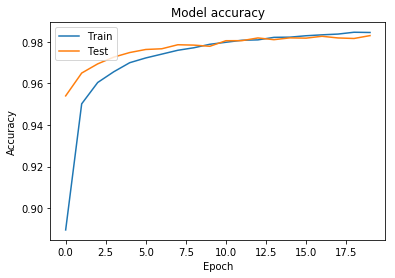

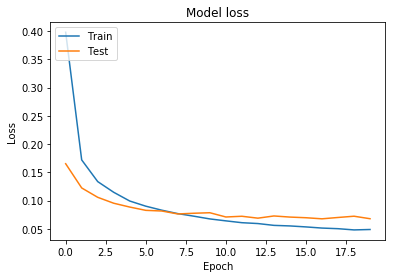

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

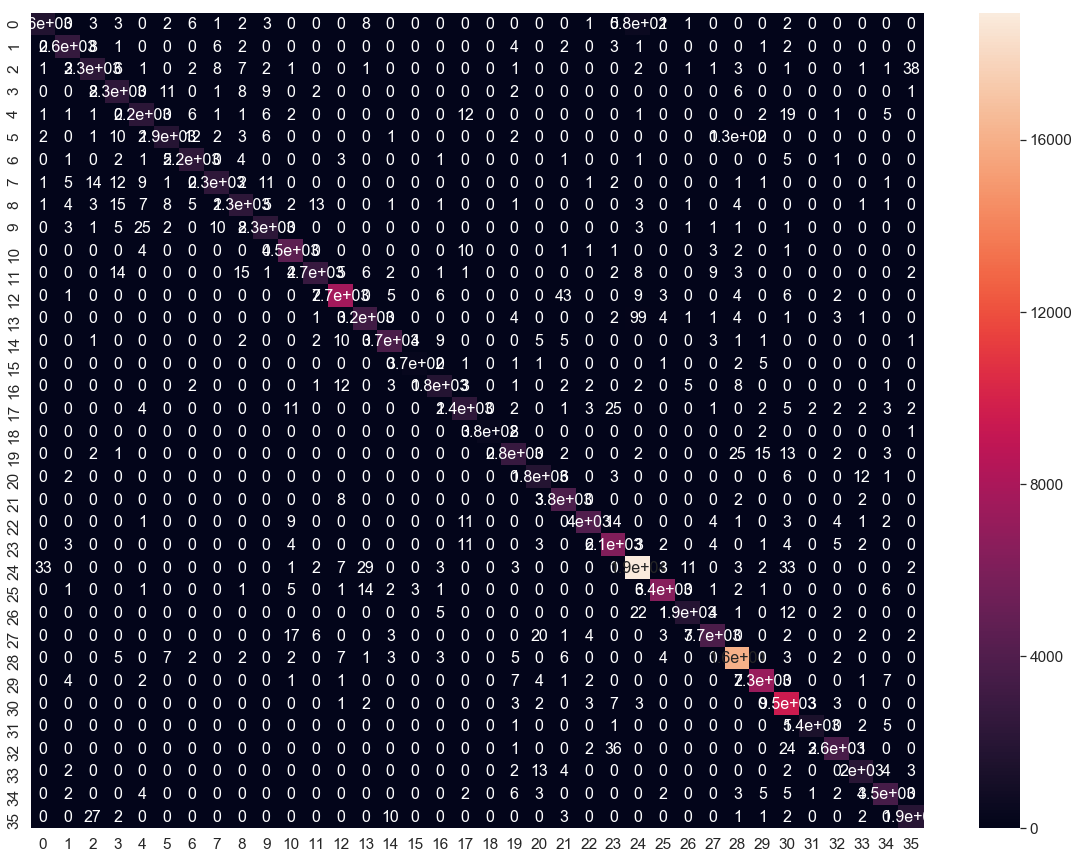

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(36),
                  range(36))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

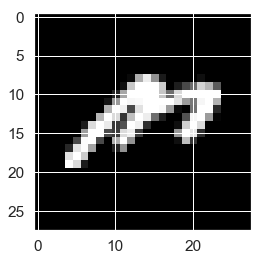

In [58]:
c = X_train[1].reshape(28,28)
plt.imshow(c, cmap='gray')
plt.show()

In [59]:
model.evaluate(X_test, y_test)

146009/146009 [==============================] - 6s 40us/step


[0.06787274053785057, 0.9829325589518454]